# Titanic Predict

In [1]:
import numpy as np
import pandas as pd

In [3]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv("test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Find the survive rate of women only

In [5]:
women = train_data.loc[train_data.Sex == 'female']['Survived'] #women now has 891 survived or not
rate_women = sum(women)/len(women)
print("% of women who survived: ", rate_women)

% of women who survived:  0.7420382165605095


## Find the servive rate of men only

In [6]:
men = train_data.loc[train_data.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)
print("% of men who survived: ", rate_men)

% of men who survived:  0.18890814558058924


## Random Forest 

In [197]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('tut_submit.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [198]:
# choose features
# Name string cannot convert to num -> remove 3 
            # Ticket too much to convert -> remove 8
            # Cabin missing data -> remove 10
            # Embarked not dummy -> remove 11
            
from sklearn.ensemble import RandomForestClassifier
#train_data_1 = train_data.iloc[:,np.r_[0,1,2,4:8,9]]
#train_data_1 = train_data_1.dropna()
features = ["Pclass", "Sex","SibSp","Parch","Fare"]
X = pd.get_dummies(train_data[features]) # count from the first as 0,1, 2...
#X
Y = train_data["Survived"]
#train_data.shape
#np.r_[1,3:13]
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X,Y)

#list(X)   list all the column names of a dataset
#model.feature_importances_
#now features are 8, sex -> male + female
#f = ["PassengerId", "Pclass", "Sex_female","Sex_male" "Age","SibSp","Parch","Fare"]
feature_imp = pd.Series(model.feature_importances_,index=list(X)).sort_values(ascending=False)
feature_imp # rank the important features 

Sex_female    0.299744
Sex_male      0.267581
Fare          0.188861
Pclass        0.145881
SibSp         0.053519
Parch         0.044414
dtype: float64

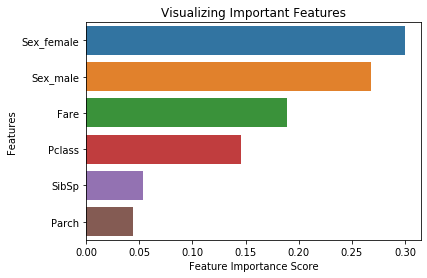

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()
# remove sbSp , Parch, Age

## after doing feature selection, we found only the four features that we chose in the previous solution is the best.  

from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "Fare"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

#output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
#output.to_csv('/Users/Starkjing/数据分析/Kaggle/titanic/titanic/tut_submit.csv', index=False)
#print("Your submission was successfully saved!")

# Iris Predict

In [142]:
from sklearn import datasets

iris = datasets.load_iris()
#iris
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [143]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## 1. separate the columns into dependent and independent columns

In [144]:
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
# [row,coln:row,column]
# now we can use the dataframe directly, it's more convenient to use
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 2. split variables into trainning and testing data set

In [145]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

## 3. train model 

In [146]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

## 4. check accuracy

In [147]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


## You can predict a specific type of flower

In [148]:
clf.predict([[3,5,4,2]])

array([2])

## Improvement: choose important features (First try is good enough)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [150]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#clf.feature_importances_
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp # rank the important features 

array([0.07659732, 0.02140668, 0.43798163, 0.46401437])

## Draw diagram

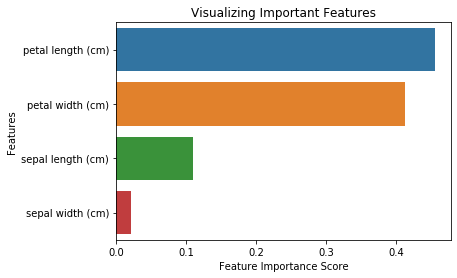

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

In [141]:
# now we know 'speal width' is less important
# remove it
from sklearn.model_selection import train_test_split
# Split dataset into features and labels
X=data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal width"
y=data['species']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5)

In [33]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523


In [35]:
clf.predict([[3,5,4]])

array([2])